# Week 12 Homework

In [2]:
# Initial Set-Up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 


The decision to utilize Machine Learning or not is based on the answers to several important questions, which I have outlined here:
####  i)  Do you have ideas as to why this situation has occurred?  
Examining the driving causes behind a noticeable change in outcomes for a business is a key piece to determining whether Machine Learning can help.
#### ii)  Do you have enough data to accurately examine the situation?  
If there is insufficient data, machine learning is not a good idea.  This lack of data could be due to not enough time passing since the change began, or it could be because the data is not readily accessible or easily extracted from the body of data available.  
#### iii)  Can we use Machine Learning to predict what is needed for addressing the situation in a practical way?  
In other words, are you able to make predictions based on the knowledge available that allow the business to act accordingly? 
#### iv) Is Machine Learning the fiscally responsible decision for the business?  
If the cost of Machine Learning requires more time and/or money than that which is gained after Machine Learning has been utilized, then it would be foolish for a business to invest in it.
#### v)  Is the potential solution actionable?  
Can the potential plan for improving the situation be rolled out to all customers or people involved in such a way that is cost-effective and impactful? This question is answered best through examining accuracy, precision, recall, and error.  Accuracy tells us what percentage of the predictions made by the model were accurate, whereas precision tells what percentage of those predicted to churn actually did churn.  Recall tells us what percentage of those expected to churn were captured by the model.   And finally, the regression error tells us how accurate the model actually fits the data based on how far each data point is from the value predicted by the model.  All of these metrics need to be considered thoroughly to determine whether a model can be rolled out to a larger population.

##### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 


In [3]:
loans=pd.read_csv('loans_full_schema.csv')
loans_df=pd.DataFrame(loans)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


#### Cleaning up null values

In [17]:
#Remove categorical data from dataframe
num_loans = loans_df.select_dtypes(exclude='object')
print(num_loans)

      emp_length  annual_income  debt_to_income  annual_income_joint  \
0            3.0        90000.0           18.01                  NaN   
1           10.0        40000.0            5.04                  NaN   
2            3.0        40000.0           21.15                  NaN   
3            1.0        30000.0           10.16                  NaN   
4           10.0        35000.0           57.96              57000.0   
...          ...            ...             ...                  ...   
9995        10.0       108000.0           22.28                  NaN   
9996         8.0       121000.0           32.38                  NaN   
9997        10.0        67000.0           45.26             107000.0   
9998         1.0        80000.0           11.99                  NaN   
9999         3.0        66000.0           20.82                  NaN   

      debt_to_income_joint  delinq_2y  months_since_last_delinq  \
0                      NaN          0                      38.0   
1

In [18]:
num_loans.isnull().sum()

emp_length                           817
annual_income                          0
debt_to_income                        24
annual_income_joint                 8505
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit

In [55]:
# Remove columns with over 50% null values
drop_columns=[]

for i in range(len(loans_df.index)):
    if loans_df.iloc[i].isnull().sum()>100:
        drop_columns=drop_columns + loans.df[i]
    else:
        pass

#loans_df.drop(columns=['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late'])
print(loans_df.shape)
print(drop_columns)
#loans_df.isnull().sum()

(10000, 55)
[]


In [27]:
# Search for categorical data with only a few unique entries
loans_df.nunique()

emp_title                           4741
emp_length                            11
state                                 50
homeownership                          3
annual_income                       1463
verified_income                        3
debt_to_income                      3673
annual_income_joint                  596
verification_income_joint              3
debt_to_income_joint                1189
delinq_2y                             12
months_since_last_delinq              97
earliest_credit_line                  53
inquiries_last_12m                    26
total_credit_lines                    78
open_credit_lines                     45
total_credit_limit                  9119
total_credit_utilized               9497
num_collections_last_12m               4
num_historical_failed_to_pay           9
months_since_90d_late                106
current_accounts_delinq                2
total_collection_amount_ever         896
current_installment_accounts          30
accounts_opened_

In [30]:
print(loans_df.homeownership.unique())

['MORTGAGE' 'RENT' 'OWN']


In [31]:
print(loans_df.verified_income.unique())

['Verified' 'Not Verified' 'Source Verified']


In [32]:
print(loans_df.verification_income_joint.unique())

[nan 'Verified' 'Not Verified' 'Source Verified']


In [34]:
print(loans_df.current_accounts_delinq.unique())


[0 1]


In [35]:
print(loans_df.num_accounts_120d_past_due.unique())

[ 0. nan]


In [36]:
print(loans_df.num_accounts_30d_past_due.unique())

[0 1]


In [37]:
print(loans_df.application_type.unique())

['individual' 'joint']


In [38]:
print(loans_df.term.unique())

[60 36]


In [39]:
print(loans_df.issue_month.unique())

['Mar-2018' 'Feb-2018' 'Jan-2018']


In [40]:
print(loans_df.initial_listing_status.unique())

['whole' 'fractional']


In [41]:
print(loans_df.disbursement_method.unique())

['Cash' 'DirectPay']


In [ ]:
df.isnull().values.any()

##### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

                                  emp_length  annual_income  debt_to_income  \
emp_length                          1.000000       0.096469        0.026157   
annual_income                       0.096469       1.000000       -0.180445   
debt_to_income                      0.026157      -0.180445        1.000000   
annual_income_joint                 0.071282       0.724664       -0.047284   
debt_to_income_joint                0.002103      -0.179790        0.348912   
delinq_2y                           0.008242       0.052236       -0.027517   
months_since_last_delinq            0.028790      -0.040392        0.034637   
earliest_credit_line               -0.234408      -0.156001       -0.089700   
inquiries_last_12m                  0.003753       0.090119        0.025388   
total_credit_lines                  0.133472       0.210163        0.198647   
open_credit_lines                   0.067415       0.176788        0.217078   
total_credit_limit                  0.147594       0

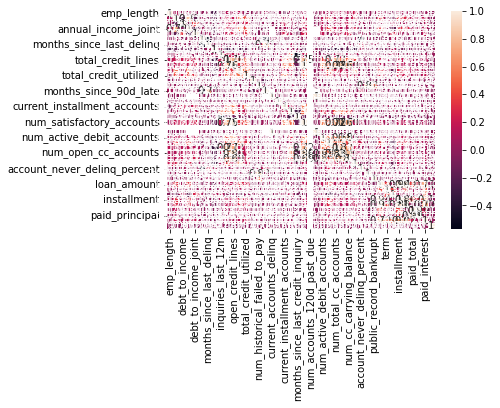

In [49]:
columns=['emp_length','annual_income', 'debt_to_income', 'homeownership', 'total_credit_limit', 'total_credit_utilized', 'inquiries_last_12m', 'months_since_last_inquiry', 'grade', 'interest_rate']
print(loans.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(loans.corr(), annot=True)
  
# displaying heatmap
plt.show()

##### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

##### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

##### a.	Is there a better way to do this than with a lambda? 

##### b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

##### 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

##### 7.	Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful. 

What does a typical work day look like in your profession?

How much of your work day involves collaboration with others as opposed to individualized tasks.

Does your profession allow you to have work/life balance?

What is the most gratifying part of your profession, in your opinion?

# DataCamp

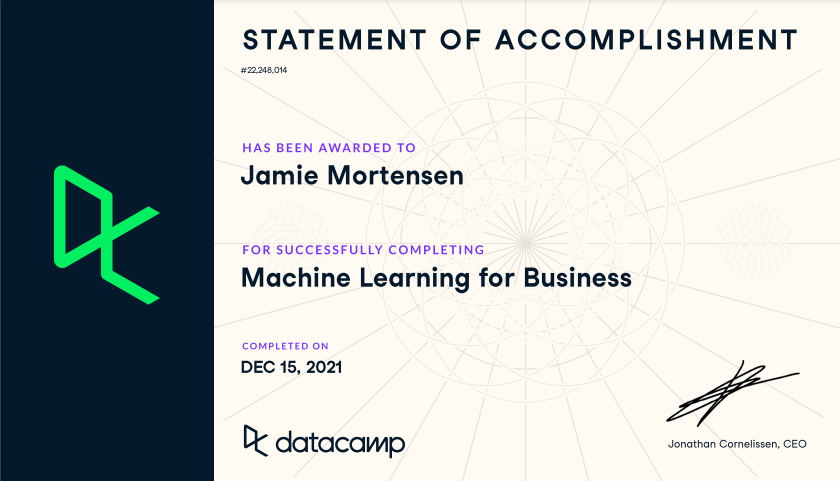

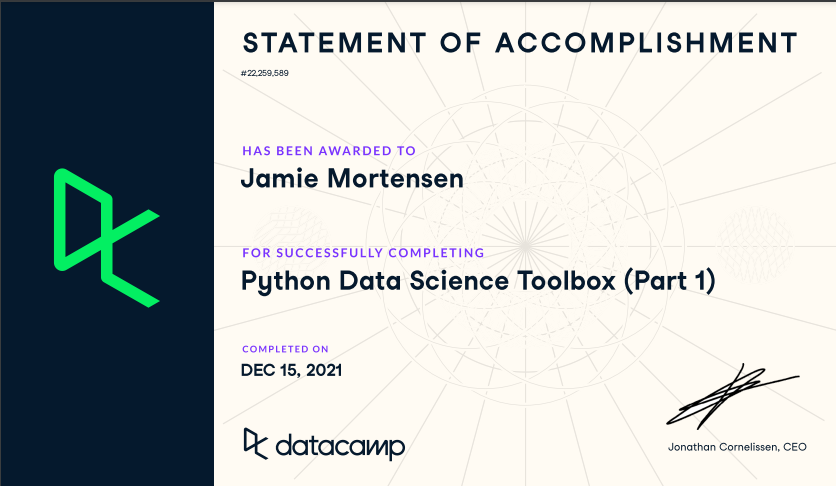